In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [3]:
data=pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
data['fetal_health'] = data['fetal_health'].replace(1.0,0)
data['fetal_health'] = data['fetal_health'].replace(2.0,0)
data['fetal_health'] = data['fetal_health'].replace(3.0,1)

In [5]:
X = data.drop('fetal_health', axis = 1)

In [6]:
y = data['fetal_health']

In [7]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=142)


In [10]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score

In [29]:
plsr = PLSRegression(n_components=2) 
plsr.fit(x_train, y_train)

ypred = plsr.predict(x_test)
ypred_binary = (ypred > 0.5).astype('uint8')
ypred_binary

print(accuracy_score(y_test, ypred_binary))

0.9553990610328639


<AxesSubplot:>

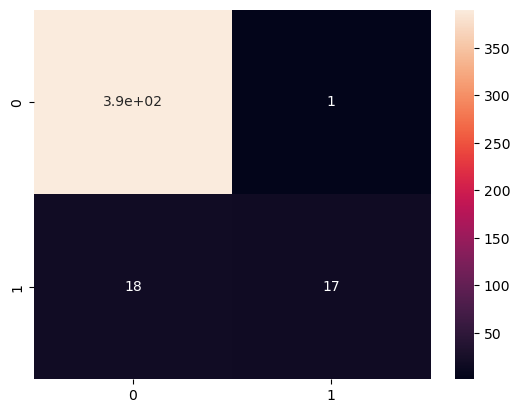

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_binary)

sns.heatmap(cm, annot=True)

In [36]:
from sklearn.metrics import  roc_auc_score
uc_roc = roc_auc_score(y_test, ypred_binary, multi_class='ovr')
uc_roc


0.7415783704786263

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_binary))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       391
         1.0       0.93      0.37      0.53        35

    accuracy                           0.95       426
   macro avg       0.94      0.68      0.75       426
weighted avg       0.95      0.95      0.94       426

